In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
# 显示图像
def img_show(img):
    if len(img.shape) == 3:
        if img.shape[-1]==3:
            b,g,r = cv2.split(img)
            img = cv2.merge([r,g,b])
        elif img.shape[-1]==4:
            b,g,r,a = cv2.split(img)
            img = img
        plt.imshow(img)
    elif len(img.shape) == 2:
        plt.imshow(img)

In [3]:
# 随机加椒盐函数
def salt(img,n):
    # 循环添加n个椒盐
    for k in range(n):
        # 随机添加椒盐的坐标
        i = int(np.random.random()*img.shape[0])
        j = int(np.random.random()*img.shape[1])
        # 若位灰度图
        img[i,j] = 255
        # 若为RGB图
        img[i,j,0] = 255
        img[i,j,0] = 255
        img[i,j,0] = 255
    return img

In [4]:
# 清洗锐化图片
def cleaning(img):
    bgr = cv2.split(img)
    bgrNew = []
    for c in bgr:
        c = cv2.threshold(c,127,255,cv2.THRESH_BINARY)
        bgrNew.append(c[1])
    img = cv2.merge(bgrNew)
    return img

hand = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/hand.png")
cleaning(hand)
cv2.imwrite("/Users/tanjun/Desktop/tanjun/opencv/hand.png",hand)

True

In [5]:
# 直方图从图像内部灰度级的角度对图像进行表述，包含丰富且重要信息。从直方图角度对图像进行处理，可达到增强图像显示效果的目的

# 13.1 直方图的含义

In [6]:
# 从统计角度讲，直方图是图像内灰度值的统计特性与图像灰度值之间的函数，直方图统计图像内各个灰度级出现的次数。
# 从直方图上观察，横坐标是图像中各个像素点的灰度级，纵坐标是具有该灰度级的像素个数
# 实际处理中，直方图x轴的区间是[0,255],对应8位图的256个灰度级，y轴是像素点个数
# 有时为了便于显示进行归一化，x轴还是灰度级，y轴表示该灰度级出现的频率
# 灰度级出现频率 = 灰度级出现次数/总像素数

# 在opencv的官网上，特别提出了要注意的三个概念：DIMS，BINS，RANGE
# DIMS：表示在绘制直方图时，收集的参数的数量。一般直方图中收集的数据只有一种，就是灰度级，因此该值位1
# BINS：参数子集的数目。在处理数据的过程中，有时需要将众多的数据划分位若干个组，再进行分析
# RANGE：表示要统计的灰度级范围。一般[0,255],0：黑色，255：白色

# 13.2 绘制直方图

In [7]:
# Python模块matplotlib.pyplot中的hist()函数能够方便地绘制直方图
# opencv的cv2.calcHist()函数能计算统计直方图，还可在此基础上绘制图像的直方图

### 13.2.1 使用Numpy绘制直方图

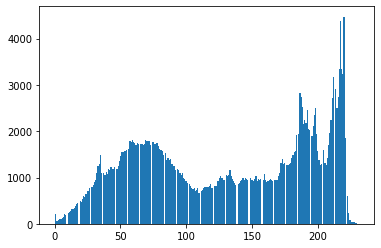

In [14]:
# matplotlib.pyplot.hist(X,BINS)
# X：数据源，必须是一维的。图像通常是二维的，需使用ravel()函数将图像处理成一维后再作为参数
# BINS：分组数量。这里表示灰度级的分组情况
wzx = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg")
x = wzx[:,:,0]
x = x.ravel()
plt.hist(x,256)
plt.show()

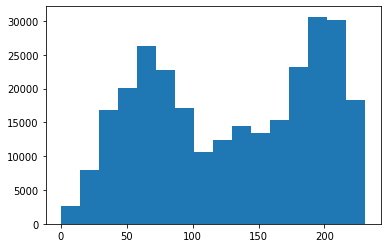

In [15]:
wzx = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg")
x = wzx[:,:,0]
x = x.ravel()
plt.hist(x,16)
plt.show()

### 13.2.2 使用opencv绘制直方图

In [16]:
# opencv提供函数cv2.calcHist()用来计算图像的统计直方图，该函数能统计各个灰度级的像素点个数
# 利用plt.plot()函数可将cv2.calcHist()的统计结果绘制成直方图

# 1.用cv2.calcHist()函数统计图像直方图信息
# hist = cv2.calcHist(imges,channels,mask,histSize,ranges,accumulate)
# hist：返回的统计直方图，是一个一维数组，数组内的元素是各个灰度级的像素个数
# images：原始图像，该图像要用[]括起来
# channels：指定通道编号。通道编号要用[]括起来，单通道：[0]；彩色通道：[0]、[1]、[2]，分别对应B、G、R
# mask：掩模图像。当统计整幅图像的直方图时，该值设None，统计部分图像需构建掩模
# histSize：BINS的值，该值要用[]括起来，如[256]
# ranges：即像素值范围。如8位灰度图的像素值范围是[0,255]
# accumulate：累计（累积，叠加）标识，默认False。
# 为True时，则直方图在开始计算时不会被清零，计算是多个直方图的累积结果，用于对一组图片计算直方图
# 该参数允许从多个对象中计算单个直方图，或者实时更新直方图，可选，一般不设置

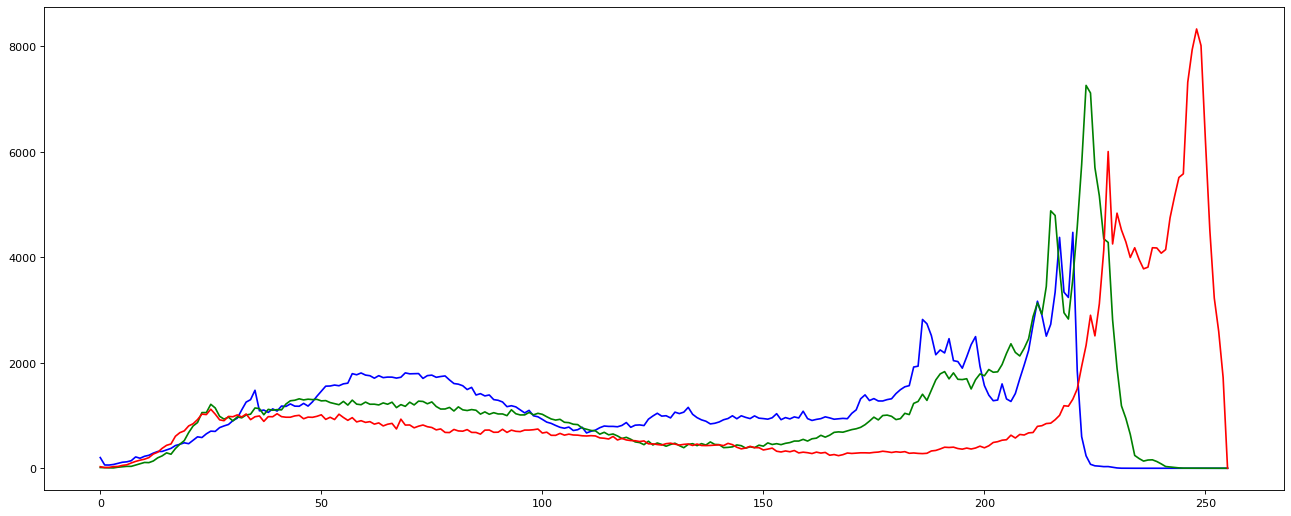

In [31]:
wzx = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg")
histb = cv2.calcHist([wzx],[0],None,[256],[0,255])
histg = cv2.calcHist([wzx],[1],None,[256],[0,255])
histr = cv2.calcHist([wzx],[2],None,[256],[0,255])

x = list(range(256))
plt.figure(figsize=(20,8),dpi=80)
plt.plot(x,histb,color="b")
plt.plot(x,histg,color="g")
plt.plot(x,histr,color="r")

plt.show()

### 13.2.3 使用模版绘制直方图

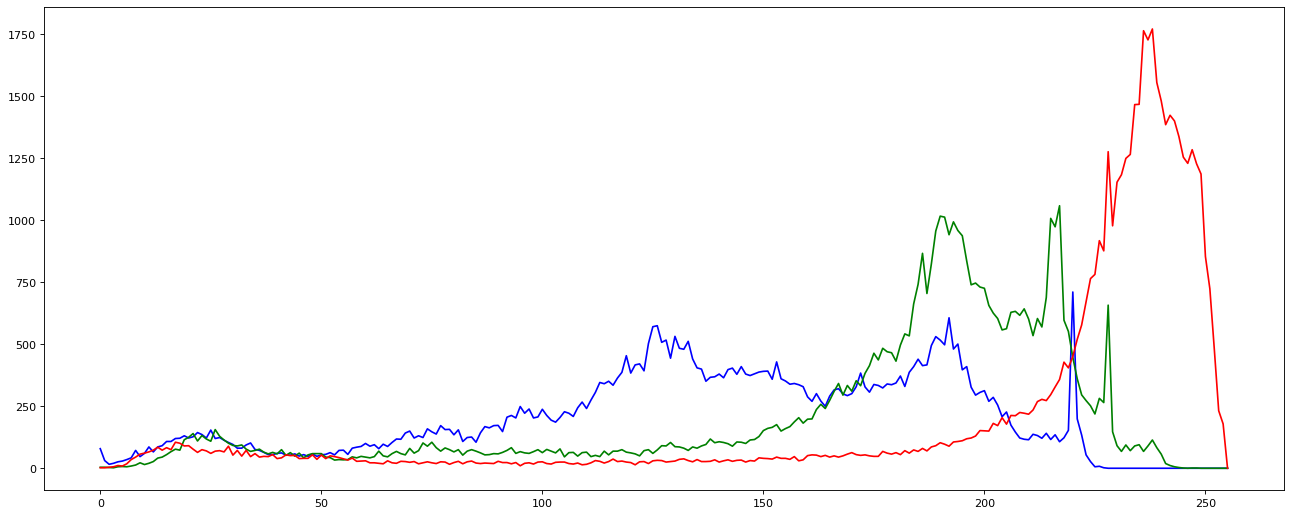

In [37]:
wzx = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg")
mask = np.zeros(wzx.shape[:2],np.uint8)
mask[200:400,170:430] = 255
histb = cv2.calcHist([wzx],[0],mask,[256],[0,255])
histg = cv2.calcHist([wzx],[1],mask,[256],[0,255])
histr = cv2.calcHist([wzx],[2],mask,[256],[0,255])

plt.figure(figsize=(20,8),dpi=80)
plt.plot(histb,color="b")
plt.plot(histg,color="g")
plt.plot(histr,color="r")

plt.show()

# 13.3 直方图均衡化

In [38]:
# 如果一幅图拥有全部可能的灰度级，并且像素值的灰度均匀分布，那么这幅图像就具有高对比度和多变的灰度色调，灰度级丰富且覆盖范围较大
# 在外观上，这幅图具有更丰富的色彩，不会过暗或过亮
# 直方图均衡化的主要目的是将原始图像的灰度级均匀地映射到整个灰度级范围内，得到一个灰度级分布均匀的图像。
# 这种均衡化，既实现了灰度值统计上的概率均衡，也实现了人类视觉系统（HVS）上的视觉均衡

# 灰度级（像素值）      ： 1  2  3  101  102  103
# A图像素个数分布（均衡）： 1  1  1   1    1    1
# A图像素个数分布（不均）： 1  1  1   0    0    1

### 13.3.1 直方图均衡化原理

In [39]:
# 步骤：
# 1）计算累计直方图
# 2）对累计直方图进行区间转换
# 在此基础上，再利用人眼视觉达到直方图均衡化目的

# 例如，下图A是一幅3位的位图，即共8(2^3)个灰度级，49个像素：
# 0 1 4 1 7 3 3
# 0 0 4 0 0 1 3
# 1 2 7 5 7 4 6
# 0 4 0 1 1 6 6
# 7 1 2 2 7 3 3
# 4 5 7 4 2 7 2
# 0 7 1 5 2 0 1

# 图A共8个灰度级，范围[0,7],计算统计直方图：
# 灰度级  ： 0 1 2 3 4 5 6 7
# 像素个数： 9 9 6 5 6 3 3 8

# 在此基础上，计算归一化统计直方图，出现概率=出现次数/像素总数：
# 灰度级  ： 0     1     2     3     4     5     6     7
# 概率   ：0.18  0.18  0.12  0.10  0.12  0.06  0.06  0.16

# 接下来，计算累计统计直方图，即计算所有灰度级的累计概率：
# 灰度级   ： 0     1     2     3     4     5     6     7
# 累计概率 ：0.18  0.37  0.49  0.59  0.71  0.78  0.84  1.00

# 在累计统计直方图基础上，对原有灰度级空间进行转换：
# 1.可以在原有范围内对灰度级实现均衡化
# 2.也可在更广泛范围内对灰度级实现均衡化

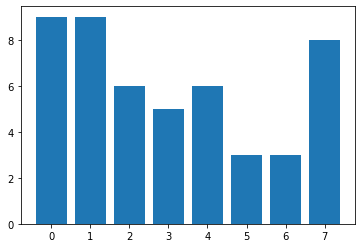

In [50]:
# 1.在原有范围内实现均衡化
# 用当前灰度级的累计概率*当前灰度级的最大值7，得到新的灰度级，并作为均衡化后的结果：
# 灰度级   ： 0     1     2     3     4     5     6     7   ：（旧的灰度级）
# 累计概率 ：0.18  0.37  0.49  0.59  0.71  0.78  0.84  1.00 ：（*7）
# 均衡化值 ： 1     3     3     4     5     5     6     7   ：（新的灰度级）

# 根据上方计算的统计直方图表，完成均衡化值（新灰度值）的映射：
# 如原始图像A中灰度级1和2经直方图均衡化后调整位灰度级3，在原图A中灰度级1有9个像素点，灰度级2有6个，所以均衡化后的灰度级3有15个像素点
# 依次类推，算出其他新灰度级的像素点：
# 灰度级   ： 0  1  2  3  4  5  6  7
# 像素个数 ： 9  9  6  5  6  3  3  8
# 均衡化值 ： 1  3  3  4  5  5  6  7 

# 均衡化后的图像中，不存在灰度级0和2的像素点，经处理后，灰度级在整个空间上的分布会更均匀
# 值得注意的是，这里的均衡化是综合考虑了统计概率和HVS的结果
# 图像A未进行均衡化前，灰度级0-3之间的像素个数29个，灰度级4-7之间的像素个数20个
# 图像A均衡化后，灰度级0-3之间的像素个数24个，灰度级4-7之间的像素个数25个，分布更均匀了

x = list(range(8))
y = [9,9,6,5,6,3,3,8]
plt.bar(x,y)
plt.show()

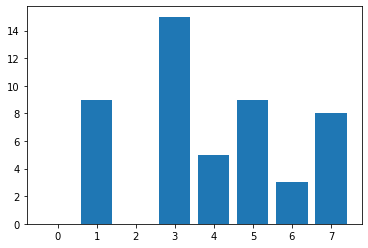

In [51]:
x = list(range(8))
y = [0,9,0,15,5,9,3,8]
plt.bar(x,y)
plt.show()

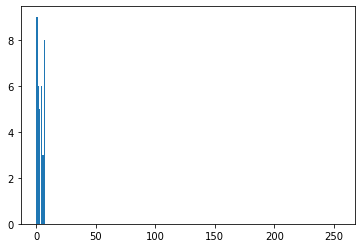

In [55]:
# 2.在更广泛的范围内实现均衡化
# 用当前灰度级的累计概率*更广泛灰度级的最大值，得到新的灰度级：
# 灰度级   ： 0     1     2     3     4     5     6     7   ：（旧的灰度级）
# 累计概率 ：0.18  0.37  0.49  0.59  0.71  0.78  0.84  1.00 ：（*255）
# 均衡化值 ： 47    94   125   151   182   198   213   225  ：（新的灰度级）

x = list(range(256))
y = np.zeros(256)
y[:8] = [9,9,6,5,6,3,3,8]
plt.bar(x,y)
plt.show()

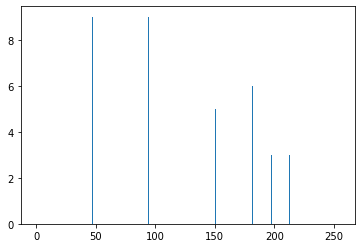

In [56]:
x = list(range(256))
y = np.zeros(256)
idx = [47,94,125,151,182,198,213,225]
val = [9,9,6,5,6,3,3,8]
for i in range(8):
    y[idx[i]] = val[i]
plt.bar(x,y)
plt.show()

In [57]:
# 总结：
# 直方图均衡化是图像色彩更均衡，外观更清晰，也使图像更便于处理，被广泛应用在医学图像处理，车牌识别，人脸识别等领域

### 13.3.2 直方图均衡化处理

In [58]:
# opencv使用函数cv2.equalizeHist()实现直方图均衡化：
# dst = cv2.equalizeHist(src)
# dst：处理结果
# src：8位单通道原始图像

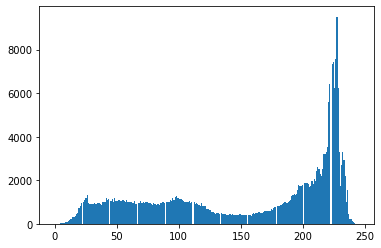

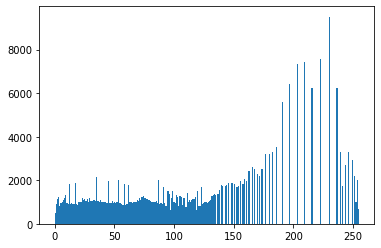

In [78]:
wzx = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg",cv2.IMREAD_GRAYSCALE)
equ = cv2.equalizeHist(wzx)

plt.figure()
plt.hist(wzx.ravel(),256)
plt.figure()
plt.hist(equ.ravel(),256)
plt.show()

# 原始图像的像素大部风集中在右侧，[200,255],图像较亮
# 均衡化后，左侧像素点比较密集，右侧较稀疏，
# 但肉眼并不能明显感受到像素值的细微变化，所以我们可以将相近的像素值看成同一个像素，此时是方图内灰度级上的像素就比较均衡了，是均匀一致的直方图
# 或者从另个角度理解，左侧线条密集，但高度不高，右侧高度高，但线条稀疏，如果将灰度级按区间划分，则分布在每个区间的像素点个数就大体一致了
# 如将区间划分成[0,50],[51,100],[101,150],[151,200],[201,250],[251,255],这样每个区间的像素数量就大体一致了
# 本例进一步说明，均衡化是综合考虑统计概率和HVS的均衡化结果

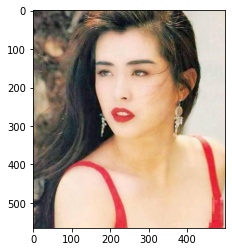

In [65]:
wzx = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg")
b,g,r = cv2.split(wzx)

b = cv2.equalizeHist(b)
g = cv2.equalizeHist(g)
r = cv2.equalizeHist(r)
wzxHist = cv2.merge([b,g,r])

img_show(wzx)

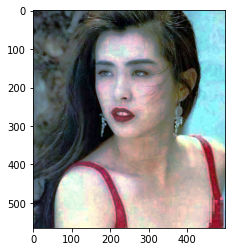

In [66]:
img_show(wzxHist)

# 13.4 pyplot 模块介绍

### 13.4.1 subplot 函数

In [84]:
# 用来向当前窗口添加一个自窗口：
# plt.subplot(nrows,ncols,index)
# nrows：行数
# ncols：列数
# index：窗口序号

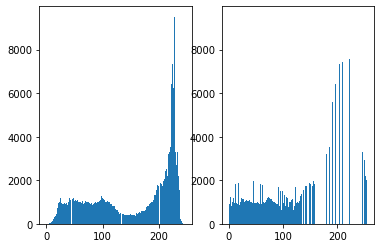

In [85]:
wzx = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg",cv2.IMREAD_GRAYSCALE)
equ = cv2.equalizeHist(wzx)

plt.figure("示例")
plt.subplot(121), plt.hist(wzx.ravel(),256)
plt.subplot(122),lt.hist(equ.ravel(),256)

plt.show()

### 13.4.2 imshow 函数

In [86]:
# 显示图像：
# plt.imshow(X,cmap=None)
# X：图像信息，可以是各种形式的数值
# cmap：色彩空间，可选，默认null，默认使用RGB(A)色彩空间

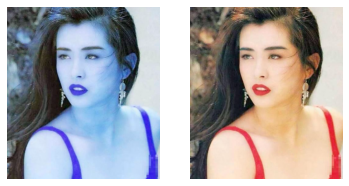

In [89]:
wzx = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg")
wzxRGB = cv2.cvtColor(wzx,cv2.COLOR_BGR2RGB)

plt.subplot(121)
plt.imshow(wzx),plt.axis("off")
plt.subplot(122)
plt.imshow(wzxRGB),plt.axis("off")
plt.show()

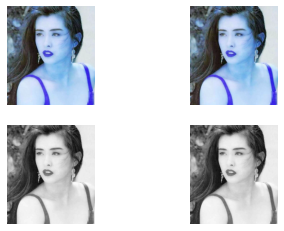

In [100]:
# 使用plt.imshow()显示灰度图
wzxBGR = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg")
wzxRGB = cv2.cvtColor(wzx,cv2.COLOR_BGR2RGB)
grayBGR = cv2.cvtColor(wzxBGR,cv2.COLOR_BGR2GRAY)
grayRGB = cv2.cvtColor(wzxRGB,cv2.COLOR_RGB2GRAY)

plt.figurea("灰度图显示")
plt.subplot(221)
plt.imshow(wzxBGR),plt.axis("off")                    # 通道错乱
plt.subplot(222)
plt.imshow(wzxBGR,cmap=plt.cm.gray),plt.axis("off")   # 失败
plt.subplot(223)
plt.imshow(grayBGR,cmap=plt.cm.gray),plt.axis("off")  # 失败
plt.subplot(224)
plt.imshow(grayRGB,cmap=plt.cm.gray),plt.axis("off")  # 只有参数是灰度图，并且将cmap设置位plt.cm.gray才能显示灰度图

plt.show()

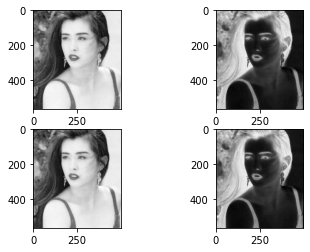

In [101]:
# 使用plt.imshow()以不同的参数显示灰度图
wzxBGR = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg")
grayBGR = cv2.cvtColor(wzxBGR,cv2.COLOR_BGR2GRAY)

plt.figure("灰度图显示")
plt.subplot(221);plt.imshow(grayBGR,cmap=plt.cm.gray)
plt.subplot(222);plt.imshow(grayBGR,cmap=plt.cm.gray_r)  # r：reverse，逆转（理解：黑变白，白变黑）
plt.subplot(223);plt.imshow(grayBGR,cmap="gray")
plt.subplot(224);plt.imshow(grayBGR,cmap="gray_r")

plt.show()